<a href="https://colab.research.google.com/github/gulistanburtek/machine-learning/blob/main/svm_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.ensemble as ske                          # Tüm sınıflandırıcıları içeren kütüphane.
from sklearn.model_selection import train_test_split    # Veriyi TRAIN/TEST olarak bölmek için.
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/machine learning /dataset/data.csv")

In [4]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

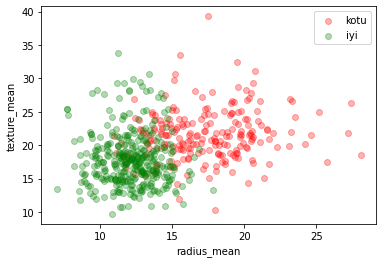

In [5]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [6]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [7]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 
SVM = SVC(random_state = 10)
SVM.fit(x_train,y_train)

# predict the results
y_predtrain = SVM.predict(x_train)
y_predtest = SVM.predict(x_test)

# view accuracy
print("Training Accuracy:",accuracy_score(y_train, y_predtrain))
print("Testing Accuracy:",accuracy_score(y_test, y_predtest))

Training Accuracy: 0.9899497487437185
Testing Accuracy: 0.9649122807017544


In [14]:
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

print accuracy of svm algo:  0.9649122807017544


In [17]:
y_predtest

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

Text(0.5, 15.0, 'Predicted label')

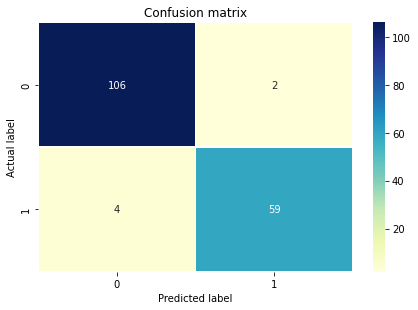

In [26]:
y_true = y_test
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm, annot=True,linewidths=0.5, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
list_accure_TEST = []
list_accure_TRAIN = []
for i in range(1,100):
  SVM = SVC(C=i,random_state=10)
  SVM.fit(x_train,y_train)
  list_accure_TEST.append(SVM.score(x_test,y_test))
  list_accure_TRAIN.append(SVM.score(x_train,y_train))

In [52]:
max(list_accure_TEST)

0.9649122807017544

In [53]:
max(list_accure_TRAIN)

1.0

In [54]:
indexTEST = list_accure_TEST.index(max(list_accure_TEST))
index

0

In [55]:
indexTRAIN = list_accure_TRAIN.index(max(list_accure_TRAIN))
index

0

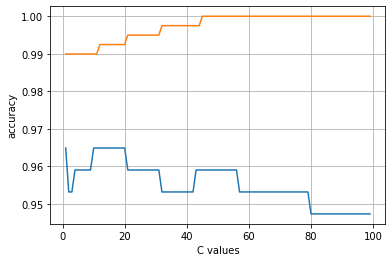

In [56]:
plt.plot(range(1,100),list_accure_TEST)
plt.plot(range(1,100),list_accure_TRAIN)
plt.xlabel("C values")
plt.ylabel("accuracy")
plt.grid()
plt.show()

In [57]:
SVM_S = SVC(C=17,random_state=10)
SVM_S.fit(x_train,y_train)

SVC(C=17, random_state=10)

In [59]:
print("print accuracy of SVM algo: {}".format(SVM_S.score(x_test,y_test)))

print accuracy of SVM algo: 0.9649122807017544


In [60]:
SVM_S.score(x_train,y_train)

0.992462311557789

In [63]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB()

In [66]:
print("print accuracy of SVM algo: {}".format(GNB.score(x_test,y_test)))

print accuracy of SVM algo: 0.935672514619883


Text(15.0, 0.5, 'y test')

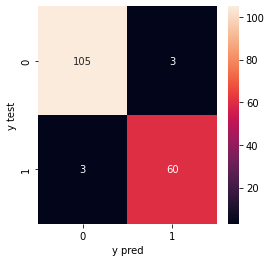

In [71]:
y_pred_svm = SVM_S.predict(x_test)
svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4,4))
sns.heatmap(svm,annot=True,fmt = ".0f" )
plt.xlabel("y pred")
plt.ylabel("y test")

Text(15.0, 0.5, 'y test')

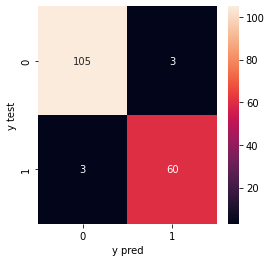

In [72]:
y_pred_gnb = GNB.predict(x_test)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(4,4))
sns.heatmap(svm,annot=True,fmt = ".0f" )
plt.xlabel("y pred")
plt.ylabel("y test")

Text(0.5, 1.0, 'SVM and GaussianNB Confusion Matrix')

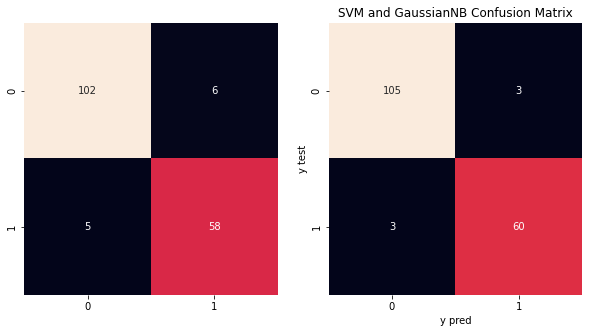

In [74]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.heatmap(cm_gnb,annot=True,fmt = ".0f" ,cbar=False,ax=axs[0])
sns.heatmap(svm,annot=True,fmt = ".0f" ,cbar=False,ax=axs[1])
plt.xlabel("y pred")
plt.ylabel("y test")
plt.title("SVM and GaussianNB Confusion Matrix")